<a href="https://colab.research.google.com/github/yvesheri4/short-pulse-electron-beam-python/blob/main/PIC_plots_5_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# pip install joypy

In [24]:
# import joypy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from sklearn.datasets import load_iris
import os
import pandas as pd
from glob import glob
import seaborn as sns

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np
from matplotlib.ticker import MaxNLocator

import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")

In [25]:
size = 26
params = {
   'axes.labelsize': size,
   'font.size': size,
   'legend.fontsize': size,
   'xtick.labelsize': size,
   'ytick.labelsize': size,
   'text.usetex': False,
   'axes.linewidth':2.75,
   'figure.figsize': [5,5]
   }
plt.rcParams.update(params)

In [26]:
def read_text_files(folder_path):
    # Initialize a dictionary to save the name and value of each DataFrame
    dict_df = {}

    # Iterate through all files and subdirectories in the given folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file starts with 'e' and has a .txt extension
            if file.startswith('e') and file.endswith('.txt'):
                # Construct the file path
                file_path = os.path.join(root, file)

                # Extract subfolder and subsubfolder names
                subfolder_name = os.path.basename(os.path.dirname(root))
                subsubfolder_name = os.path.basename(os.path.dirname(file_path))

                # Create a unique DataFrame name
                df_name = f"{subfolder_name}_{subsubfolder_name}_{os.path.splitext(file)[0]}"

                # Define custom column names
                column_names = ['p', 'e', 'n']

                # Read the text file into a DataFrame, skipping the first line and using custom column names
                df = pd.read_csv(file_path, delimiter='\t\t', skiprows=2, names=column_names)

                # Define the values to be dropped
                values_to_drop = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 46, 46.5, 47, 47.5, 48, 48.5, 49, 49.5, 50]

                # Drop rows where 'p' column matches the specified values
                df = df[~df['p'].isin(values_to_drop)]

                # Assign the DataFrame to the dynamically generated name
                globals()[df_name] = df

                # Save the DataFrame and its name to the dictionary
                dict_df[df_name] = df

                # Print information about the loaded DataFrame
                print(f"Loaded DataFrame '{df_name}' from '{file_path}'")

    # Return the dictionary containing DataFrame names and values
    return dict_df

In [27]:
# Example usage:
folder_path = '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/energy'
dict_df = read_text_files(folder_path)

Loaded DataFrame 'energy_square_top_e01_1' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/energy/square_top/e01_1.txt'
Loaded DataFrame 'energy_square_top_e01_2' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/energy/square_top/e01_2.txt'
Loaded DataFrame 'energy_square_top_e01_3' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/energy/square_top/e01_3.txt'
Loaded DataFrame 'energy_square_top_e05_1' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/energy/square_top/e05_1.txt'
Loaded DataFrame 'energy_square_top_e05_2' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/energy/square_top/e05_2.txt'
Loaded DataFrame 'energy_square_top_e05_3' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/energy/square_top/e05_3.txt'
Loaded DataFrame 'energy_square_top_e1_1' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/energy/square_top/e1_1.txt'
Loaded DataFrame 'energy_square_top_e1_2' from '/content/drive/MyDrive/Research/PIC/N

In [28]:
dict_df.keys()

dict_keys(['energy_square_top_e01_1', 'energy_square_top_e01_2', 'energy_square_top_e01_3', 'energy_square_top_e05_1', 'energy_square_top_e05_2', 'energy_square_top_e05_3', 'energy_square_top_e1_1', 'energy_square_top_e1_2', 'energy_square_top_e1_3', 'energy_gaussian_e01_1', 'energy_gaussian_e01_2', 'energy_gaussian_e01_3', 'energy_gaussian_e05_1', 'energy_gaussian_e05_2', 'energy_gaussian_e05_3', 'energy_gaussian_e1_1', 'energy_gaussian_e1_2', 'energy_gaussian_e1_3', 'energy_trapezoidal_e01_1', 'energy_trapezoidal_e01_2', 'energy_trapezoidal_e01_3', 'energy_trapezoidal_e05_1', 'energy_trapezoidal_e05_2', 'energy_trapezoidal_e05_3', 'energy_trapezoidal_e1_1', 'energy_trapezoidal_e1_2', 'energy_trapezoidal_e1_3'])

In [29]:
new_dict_df = {}
# Iterate through the dictionary of DataFrames
for df_name, df in dict_df.items():
    # Group the DataFrame by the 'p' column and create a dictionary to store 'n' values for each 'p' value
    n_values_dict = {}
    for p_value, group in df.groupby('p'):
        n_values_dict[p_value] = group['n'].tolist()

    # Create a new DataFrame using the dictionary
    new_df = pd.DataFrame(n_values_dict)

    # Add a new column 'mean' containing the mean of each row across the columns
    new_df['mean'] = new_df.mean(axis=1)

    # Store the new DataFrame in the dictionary
    new_dict_df[df_name] = new_df

In [30]:
e_range = dict_df[df_name]['e'].unique()/1000
e_range

array([18. , 18.4, 18.8, 19.2, 19.6, 20. , 20.4, 20.8, 21.2, 21.6, 22. ,
       22.4, 22.8, 23.2, 23.6, 24. , 24.4, 24.8, 25.2, 25.6, 26. , 26.4,
       26.8, 27.2, 27.6, 28. , 28.4, 28.8, 29.2, 29.6, 30. , 30.4, 30.8,
       31.2, 31.6, 32. , 32.4, 32.8, 33.2, 33.6, 34. , 34.4, 34.8, 35.2,
       35.6, 36. , 36.4, 36.8, 37.2, 37.6, 38. , 38.4, 38.8, 39.2, 39.6,
       40. , 40.4, 40.8, 41.2, 41.6, 42. ])

# Gaussian Data

In [31]:
# Initialize empty DataFrames for T1, T2, and T3 columns
T1_df = pd.DataFrame()
T2_df = pd.DataFrame()
T3_df = pd.DataFrame()

# Iterate through the dictionary of DataFrames
for df_name, df in new_dict_df.items():
    # Check if the DataFrame name contains 'Gaussian_k01_e2'
    if 'gaussian_e01_1' in df_name:
        # Assign the 'mean' column to T1 DataFrame
        T1_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e3'
    elif 'gaussian_e01_2' in df_name:
        # Assign the 'mean' column to T2 DataFrame
        T2_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e4'
    elif 'gaussian_e01_3' in df_name:
        # Assign the 'mean' column to T3 DataFrame
        T3_df = df[['mean']]

# Merge T1, T2, and T3 DataFrames to create Gaussian_k01 DataFrame
Gaussian_k01 = pd.concat([T1_df.reset_index(drop=True), T2_df.reset_index(drop=True), T3_df.reset_index(drop=True),pd.DataFrame(e_range)], axis=1)
Gaussian_k01.columns = ['T1', 'T2', 'T3','e_range']

# Display the new DataFrame
print("DataFrame 'Gaussian_k01':")
print(Gaussian_k01)

DataFrame 'Gaussian_k01':
     T1   T2   T3  e_range
0   0.0  0.0  0.0     18.0
1   0.0  0.0  0.0     18.4
2   0.0  0.0  0.0     18.8
3   0.0  0.0  0.0     19.2
4   0.0  0.0  0.0     19.6
..  ...  ...  ...      ...
56  0.0  0.0  0.0     40.4
57  0.0  0.0  0.0     40.8
58  0.0  0.0  0.0     41.2
59  0.0  0.0  0.0     41.6
60  0.0  0.0  0.0     42.0

[61 rows x 4 columns]


In [32]:
# Initialize empty DataFrames for T1, T2, and T3 columns
T1_df = pd.DataFrame()
T2_df = pd.DataFrame()
T3_df = pd.DataFrame()

# Iterate through the dictionary of DataFrames
for df_name, df in new_dict_df.items():
    # Check if the DataFrame name contains 'Gaussian_k01_e2'
    if 'gaussian_e05_1' in df_name:
        # Assign the 'mean' column to T1 DataFrame
        T1_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e3'
    elif 'gaussian_e05_2' in df_name:
        # Assign the 'mean' column to T2 DataFrame
        T2_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e4'
    elif 'gaussian_e05_3' in df_name:
        # Assign the 'mean' column to T3 DataFrame
        T3_df = df[['mean']]

# Merge T1, T2, and T3 DataFrames to create Gaussian_k01 DataFrame
Gaussian_k05 = pd.concat([T1_df.reset_index(drop=True), T2_df.reset_index(drop=True), T3_df.reset_index(drop=True),pd.DataFrame(e_range)], axis=1)
Gaussian_k05.columns = ['T1', 'T2', 'T3','e_range']

# Display the new DataFrame
print("DataFrame 'Gaussian_k05':")
print(Gaussian_k05)

DataFrame 'Gaussian_k05':
     T1   T2   T3  e_range
0   0.0  0.0  0.0     18.0
1   0.0  0.0  0.0     18.4
2   0.0  0.0  0.0     18.8
3   0.0  0.0  0.0     19.2
4   0.0  0.0  0.0     19.6
..  ...  ...  ...      ...
56  0.0  0.0  0.0     40.4
57  0.0  0.0  0.0     40.8
58  0.0  0.0  0.0     41.2
59  0.0  0.0  0.0     41.6
60  0.0  0.0  0.0     42.0

[61 rows x 4 columns]


In [33]:
# Initialize empty DataFrames for T1, T2, and T3 columns
T1_df = pd.DataFrame()
T2_df = pd.DataFrame()
T3_df = pd.DataFrame()

# Iterate through the dictionary of DataFrames
for df_name, df in new_dict_df.items():
    # Check if the DataFrame name contains 'Gaussian_k01_e2'
    if 'gaussian_e1_1' in df_name:
        # Assign the 'mean' column to T1 DataFrame
        T1_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e3'
    elif 'gaussian_e1_2' in df_name:
        # Assign the 'mean' column to T2 DataFrame
        T2_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e4'
    elif 'gaussian_e1_3' in df_name:
        # Assign the 'mean' column to T3 DataFrame
        T3_df = df[['mean']]

# Merge T1, T2, and T3 DataFrames to create Gaussian_k01 DataFrame
Gaussian_k1 = pd.concat([T1_df.reset_index(drop=True), T2_df.reset_index(drop=True), T3_df.reset_index(drop=True),pd.DataFrame(e_range)], axis=1)
Gaussian_k1.columns = ['T1', 'T2', 'T3','e_range']

# Display the new DataFrame
print("DataFrame 'Gaussian_k1':")
print(Gaussian_k1)

DataFrame 'Gaussian_k1':
     T1   T2   T3  e_range
0   0.0  0.0  0.0     18.0
1   0.0  0.0  0.0     18.4
2   0.0  0.0  0.0     18.8
3   0.0  0.0  0.0     19.2
4   0.0  0.0  0.0     19.6
..  ...  ...  ...      ...
56  0.0  0.0  0.0     40.4
57  0.0  0.0  0.0     40.8
58  0.0  0.0  0.0     41.2
59  0.0  0.0  0.0     41.6
60  0.0  0.0  0.0     42.0

[61 rows x 4 columns]


# Trapezoidal Data

In [34]:
# Initialize empty DataFrames for T1, T2, and T3 columns
T1_df = pd.DataFrame()
T2_df = pd.DataFrame()
T3_df = pd.DataFrame()

# Iterate through the dictionary of DataFrames
for df_name, df in new_dict_df.items():
    # Check if the DataFrame name contains 'Gaussian_k01_e2'
    if 'trapezoidal_e01_1' in df_name:
        # Assign the 'mean' column to T1 DataFrame
        T1_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e3'
    elif 'trapezoidal_e01_2' in df_name:
        # Assign the 'mean' column to T2 DataFrame
        T2_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e4'
    elif 'trapezoidal_e01_3' in df_name:
        # Assign the 'mean' column to T3 DataFrame
        T3_df = df[['mean']]

# Merge T1, T2, and T3 DataFrames to create Gaussian_k01 DataFrame
Trapezoidal_k01 = pd.concat([T1_df.reset_index(drop=True), T2_df.reset_index(drop=True), T3_df.reset_index(drop=True),pd.DataFrame(e_range)], axis=1)
Trapezoidal_k01.columns = ['T1', 'T2', 'T3','e_range']

# Display the new DataFrame
print("DataFrame 'Trapezoidal_k01':")
print(Trapezoidal_k01)

DataFrame 'Trapezoidal_k01':
     T1   T2   T3  e_range
0   0.0  0.0  0.0     18.0
1   0.0  0.0  0.0     18.4
2   0.0  0.0  0.0     18.8
3   0.0  0.0  0.0     19.2
4   0.0  0.0  0.0     19.6
..  ...  ...  ...      ...
56  0.0  0.0  0.0     40.4
57  0.0  0.0  0.0     40.8
58  0.0  0.0  0.0     41.2
59  0.0  0.0  0.0     41.6
60  0.0  0.0  0.0     42.0

[61 rows x 4 columns]


In [35]:
# Initialize empty DataFrames for T1, T2, and T3 columns
T1_df = pd.DataFrame()
T2_df = pd.DataFrame()
T3_df = pd.DataFrame()

# Iterate through the dictionary of DataFrames
for df_name, df in new_dict_df.items():
    # Check if the DataFrame name contains 'Gaussian_k01_e2'
    if 'trapezoidal_e05_1' in df_name:
        # Assign the 'mean' column to T1 DataFrame
        T1_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e3'
    elif 'trapezoidal_e05_2' in df_name:
        # Assign the 'mean' column to T2 DataFrame
        T2_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e4'
    elif 'trapezoidal_e05_3' in df_name:
        # Assign the 'mean' column to T3 DataFrame
        T3_df = df[['mean']]

# Merge T1, T2, and T3 DataFrames to create Gaussian_k01 DataFrame
Trapezoidal_k05 = pd.concat([T1_df.reset_index(drop=True), T2_df.reset_index(drop=True), T3_df.reset_index(drop=True),pd.DataFrame(e_range)], axis=1)
Trapezoidal_k05.columns = ['T1', 'T2', 'T3','e_range']

# Display the new DataFrame
print("DataFrame 'Trapezoidal_k05':")
print(Trapezoidal_k05)

DataFrame 'Trapezoidal_k05':
     T1   T2   T3  e_range
0   0.0  0.0  0.0     18.0
1   0.0  0.0  0.0     18.4
2   0.0  0.0  0.0     18.8
3   0.0  0.0  0.0     19.2
4   0.0  0.0  0.0     19.6
..  ...  ...  ...      ...
56  0.0  0.0  0.0     40.4
57  0.0  0.0  0.0     40.8
58  0.0  0.0  0.0     41.2
59  0.0  0.0  0.0     41.6
60  0.0  0.0  0.0     42.0

[61 rows x 4 columns]


In [36]:
# Initialize empty DataFrames for T1, T2, and T3 columns
T1_df = pd.DataFrame()
T2_df = pd.DataFrame()
T3_df = pd.DataFrame()

# Iterate through the dictionary of DataFrames
for df_name, df in new_dict_df.items():
    # Check if the DataFrame name contains 'Gaussian_k01_e2'
    if 'trapezoidal_e1_1' in df_name:
        # Assign the 'mean' column to T1 DataFrame
        T1_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e3'
    elif 'trapezoidal_e1_2' in df_name:
        # Assign the 'mean' column to T2 DataFrame
        T2_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e4'
    elif 'trapezoidal_e1_3' in df_name:
        # Assign the 'mean' column to T3 DataFrame
        T3_df = df[['mean']]

# Merge T1, T2, and T3 DataFrames to create Gaussian_k01 DataFrame
Trapezoidal_k1 = pd.concat([T1_df.reset_index(drop=True), T2_df.reset_index(drop=True), T3_df.reset_index(drop=True),pd.DataFrame(e_range)], axis=1)
Trapezoidal_k1.columns = ['T1', 'T2', 'T3','e_range']

# Display the new DataFrame
print("DataFrame 'Trapezoidal_k1':")
print(Trapezoidal_k1)

DataFrame 'Trapezoidal_k1':
     T1   T2   T3  e_range
0   0.0  0.0  0.0     18.0
1   0.0  0.0  0.0     18.4
2   0.0  0.0  0.0     18.8
3   0.0  0.0  0.0     19.2
4   0.0  0.0  0.0     19.6
..  ...  ...  ...      ...
56  0.0  0.0  0.0     40.4
57  0.0  0.0  0.0     40.8
58  0.0  0.0  0.0     41.2
59  0.0  0.0  0.0     41.6
60  0.0  0.0  0.0     42.0

[61 rows x 4 columns]


# Square-top

In [37]:
# Initialize empty DataFrames for T1, T2, and T3 columns
T1_df = pd.DataFrame()
T2_df = pd.DataFrame()
T3_df = pd.DataFrame()

# Iterate through the dictionary of DataFrames
for df_name, df in new_dict_df.items():
    # Check if the DataFrame name contains 'Gaussian_k01_e2'
    if 'square_top_e01_1' in df_name:
        # Assign the 'mean' column to T1 DataFrame
        T1_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e3'
    elif 'square_top_e01_2' in df_name:
        # Assign the 'mean' column to T2 DataFrame
        T2_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e4'
    elif 'square_top_e01_3' in df_name:
        # Assign the 'mean' column to T3 DataFrame
        T3_df = df[['mean']]

# Merge T1, T2, and T3 DataFrames to create Gaussian_k01 DataFrame
Square_top_k01 = pd.concat([T1_df.reset_index(drop=True), T2_df.reset_index(drop=True), T3_df.reset_index(drop=True),pd.DataFrame(e_range)], axis=1)
Square_top_k01.columns = ['T1', 'T2', 'T3','e_range']

# Display the new DataFrame
print("DataFrame 'Square_top_k01':")
print(Square_top_k01)

DataFrame 'Square_top_k01':
     T1   T2   T3  e_range
0   0.0  0.0  0.0     18.0
1   0.0  0.0  0.0     18.4
2   0.0  0.0  0.0     18.8
3   0.0  0.0  0.0     19.2
4   0.0  0.0  0.0     19.6
..  ...  ...  ...      ...
56  0.0  0.0  0.0     40.4
57  0.0  0.0  0.0     40.8
58  0.0  0.0  0.0     41.2
59  0.0  0.0  0.0     41.6
60  0.0  0.0  0.0     42.0

[61 rows x 4 columns]


In [38]:
# Initialize empty DataFrames for T1, T2, and T3 columns
T1_df = pd.DataFrame()
T2_df = pd.DataFrame()
T3_df = pd.DataFrame()

# Iterate through the dictionary of DataFrames
for df_name, df in new_dict_df.items():
    # Check if the DataFrame name contains 'Gaussian_k01_e2'
    if 'square_top_e05_1' in df_name:
        # Assign the 'mean' column to T1 DataFrame
        T1_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e3'
    elif 'square_top_e05_2' in df_name:
        # Assign the 'mean' column to T2 DataFrame
        T2_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e4'
    elif 'square_top_e05_3' in df_name:
        # Assign the 'mean' column to T3 DataFrame
        T3_df = df[['mean']]

# Merge T1, T2, and T3 DataFrames to create Gaussian_k01 DataFrame
Square_top_k05 = pd.concat([T1_df.reset_index(drop=True), T2_df.reset_index(drop=True), T3_df.reset_index(drop=True),pd.DataFrame(e_range)], axis=1)
Square_top_k05.columns = ['T1', 'T2', 'T3','e_range']

# Display the new DataFrame
print("DataFrame 'Square_top_k05':")
print(Square_top_k05)

DataFrame 'Square_top_k05':
     T1   T2   T3  e_range
0   0.0  0.0  0.0     18.0
1   0.0  0.0  0.0     18.4
2   0.0  0.0  0.0     18.8
3   0.0  0.0  0.0     19.2
4   0.0  0.0  0.0     19.6
..  ...  ...  ...      ...
56  0.0  0.0  0.0     40.4
57  0.0  0.0  0.0     40.8
58  0.0  0.0  0.0     41.2
59  0.0  0.0  0.0     41.6
60  0.0  0.0  0.0     42.0

[61 rows x 4 columns]


In [39]:
# Initialize empty DataFrames for T1, T2, and T3 columns
T1_df = pd.DataFrame()
T2_df = pd.DataFrame()
T3_df = pd.DataFrame()

# Iterate through the dictionary of DataFrames
for df_name, df in new_dict_df.items():
    # Check if the DataFrame name contains 'Gaussian_k01_e2'
    if 'square_top_e1_1' in df_name:
        # Assign the 'mean' column to T1 DataFrame
        T1_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e3'
    elif 'square_top_e1_2' in df_name:
        # Assign the 'mean' column to T2 DataFrame
        T2_df = df[['mean']]
    # Check if the DataFrame name contains 'Gaussian_k01_e4'
    elif 'square_top_e1_3' in df_name:
        # Assign the 'mean' column to T3 DataFrame
        T3_df = df[['mean']]

# Merge T1, T2, and T3 DataFrames to create Gaussian_k01 DataFrame
Square_top_k1 = pd.concat([T1_df.reset_index(drop=True), T2_df.reset_index(drop=True), T3_df.reset_index(drop=True),pd.DataFrame(e_range)], axis=1)
Square_top_k1.columns = ['T1', 'T2', 'T3','e_range']

# Display the new DataFrame
print("DataFrame 'Square_top_k1':")
print(Square_top_k1)

DataFrame 'Square_top_k1':
     T1   T2   T3  e_range
0   0.0  0.0  0.0     18.0
1   0.0  0.0  0.0     18.4
2   0.0  0.0  0.0     18.8
3   0.0  0.0  0.0     19.2
4   0.0  0.0  0.0     19.6
..  ...  ...  ...      ...
56  0.0  0.0  0.0     40.4
57  0.0  0.0  0.0     40.8
58  0.0  0.0  0.0     41.2
59  0.0  0.0  0.0     41.6
60  0.0  0.0  0.0     42.0

[61 rows x 4 columns]


# Plots

## $k = 0.1$

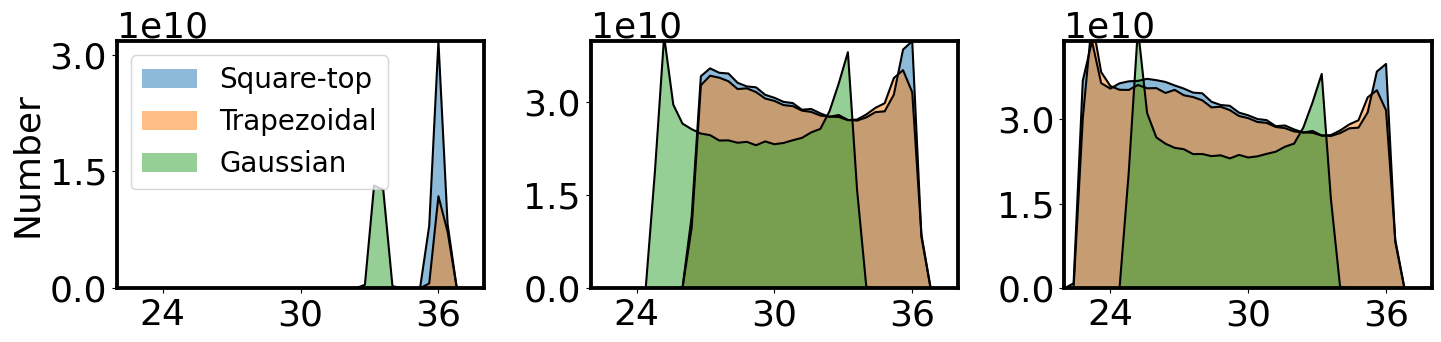

In [40]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot T1 vs. e_range with filled area
axes[0].plot(Square_top_k01['e_range'], Square_top_k01['T1'], color = 'black')
axes[0].fill_between(Square_top_k01['e_range'], Square_top_k01['T1'],label='Square-top', alpha=0.5)
axes[0].plot(Trapezoidal_k01['e_range'], Trapezoidal_k01['T1'],color = 'black')
axes[0].fill_between(Trapezoidal_k01['e_range'], Trapezoidal_k01['T1'] , label='Trapezoidal', alpha=0.5)
axes[0].plot(Gaussian_k01['e_range'], Gaussian_k01['T1'],color = 'black')
axes[0].fill_between(Gaussian_k01['e_range'], Gaussian_k01['T1'], label='Gaussian', alpha=0.5)
# axes[0].set_xlabel('Energy [$keV$]')
axes[0].set_ylabel('Number')
axes[0].set_xlim(22,38)
axes[0].set_ylim(0,max(Square_top_k01['T1']))
# Set number of bins
axes[0].xaxis.set_major_locator(MaxNLocator(nbins=3))
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=3))
axes[0].legend(fontsize=20)

# Plot T2 vs. e_range with filled area
axes[1].plot(Square_top_k01['e_range'], Square_top_k01['T2'],color = 'black')
axes[1].fill_between(Square_top_k01['e_range'], Square_top_k01['T2'], label='Square-top', alpha=0.5)
axes[1].plot(Trapezoidal_k01['e_range'], Trapezoidal_k01['T2'],color = 'black')
axes[1].fill_between(Trapezoidal_k01['e_range'], Trapezoidal_k01['T2'], label='Trapezoidal', alpha=0.5)
axes[1].plot(Gaussian_k01['e_range'], Gaussian_k01['T2'],color = 'black')
axes[1].fill_between(Gaussian_k01['e_range'], Gaussian_k01['T2'], label='Gaussian', alpha=0.5)
# axes[1].set_xlabel('Energy [$keV$]')
# axes[1].set_ylabel('Number')
axes[1].set_xlim(22,38)
axes[1].set_ylim(0,max(Square_top_k01['T2']))
# Set number of bins
axes[1].xaxis.set_major_locator(MaxNLocator(nbins=3))
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=3))
# axes[1].legend(fontsize=16)

# Plot T3 vs. e_range with filled area
axes[2].plot(Square_top_k01['e_range'], Square_top_k01['T3'],color = 'black')
axes[2].fill_between(Square_top_k01['e_range'], Square_top_k01['T3'], label='Square top $k=0.1$', alpha=0.5)
axes[2].plot(Trapezoidal_k01['e_range'], Trapezoidal_k01['T3'],color = 'black')
axes[2].fill_between(Trapezoidal_k01['e_range'], Trapezoidal_k01['T3'], label='Trapezoidal $k=0.1$', alpha=0.5)
axes[2].plot(Gaussian_k01['e_range'], Gaussian_k01['T3'],color = 'black')
axes[2].fill_between(Gaussian_k01['e_range'], Gaussian_k01['T3'], label='Gaussian $k=0.1$', alpha=0.5)
# axes[2].set_xlabel('Energy [$keV$]')
# axes[2].set_ylabel('Number')
axes[2].set_xlim(22,38)
axes[2].set_ylim(0,max(Square_top_k01['T3']))
# Set number of bins
axes[2].xaxis.set_major_locator(MaxNLocator(nbins=3))
axes[2].yaxis.set_major_locator(MaxNLocator(nbins=3))
# axes[2].legend(fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## $k=0.5$

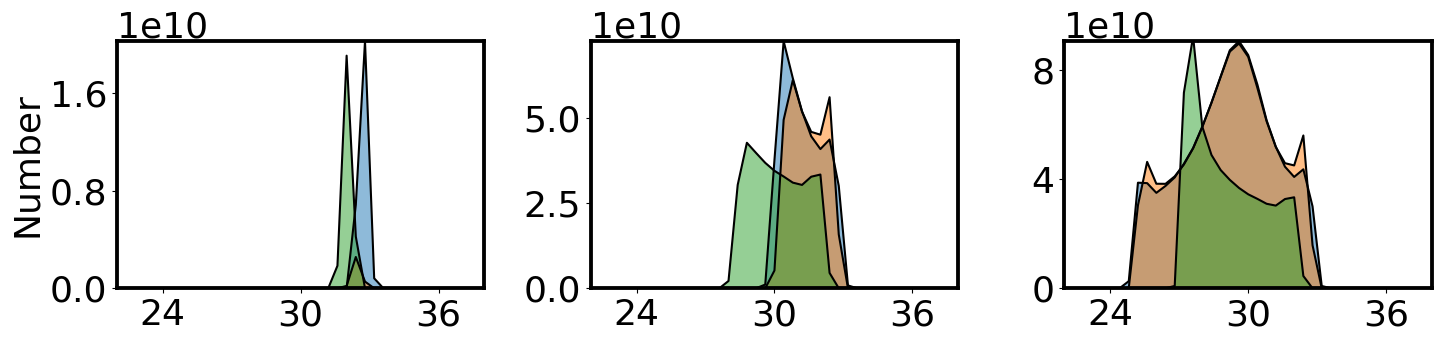

In [41]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot T1 vs. e_range with filled area
axes[0].plot(Square_top_k05['e_range'], Square_top_k05['T1'], color = 'black')
axes[0].fill_between(Square_top_k05['e_range'], Square_top_k05['T1'], label='Square-top', alpha=0.5)
axes[0].plot(Trapezoidal_k05['e_range'], Trapezoidal_k05['T1'],color = 'black')
axes[0].fill_between(Trapezoidal_k05['e_range'], Trapezoidal_k05['T1'], label='Trapezoidal', alpha=0.5)
axes[0].plot(Gaussian_k05['e_range'], Gaussian_k05['T1'],color = 'black')
axes[0].fill_between(Gaussian_k05['e_range'], Gaussian_k05['T1'], label='Gaussian', alpha=0.5)
# axes[0].set_xlabel('Energy [$keV$]')
axes[0].set_ylabel('Number')
axes[0].set_xlim(22,38)
axes[0].set_ylim(0,max(Square_top_k05['T1']))
# Set number of bins
axes[0].xaxis.set_major_locator(MaxNLocator(nbins=3))
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=3))
# axes[0].legend(fontsize=20)

# Plot T2 vs. e_range with filled area
axes[1].plot(Square_top_k05['e_range'], Square_top_k05['T2'],color = 'black')
axes[1].fill_between(Square_top_k05['e_range'], Square_top_k05['T2'], label='Square top $k=0.5$', alpha=0.5)
axes[1].plot(Trapezoidal_k05['e_range'], Trapezoidal_k05['T2'],color = 'black')
axes[1].fill_between(Trapezoidal_k05['e_range'], Trapezoidal_k05['T2'], label='Trapezoidal $k=0.5$', alpha=0.5)
axes[1].plot(Gaussian_k05['e_range'], Gaussian_k05['T2'],color = 'black')
axes[1].fill_between(Gaussian_k05['e_range'], Gaussian_k05['T2'], label='Gaussian $k=0.5$', alpha=0.5)
# axes[1].set_xlabel('Energy [$keV$]')
# axes[1].set_ylabel('Number')
axes[1].set_xlim(22,38)
axes[1].set_ylim(0,max(Square_top_k05['T2']))
# Set number of bins
axes[1].xaxis.set_major_locator(MaxNLocator(nbins=3))
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=3))
# axes[1].legend(fontsize=16)

# Plot T3 vs. e_range with filled area
axes[2].plot(Square_top_k05['e_range'], Square_top_k05['T3'],color = 'black')
axes[2].fill_between(Square_top_k05['e_range'], Square_top_k05['T3'], label='Square top $k=0.5$', alpha=0.5)
axes[2].plot(Trapezoidal_k05['e_range'], Trapezoidal_k05['T3'],color = 'black')
axes[2].fill_between(Trapezoidal_k05['e_range'], Trapezoidal_k05['T3'], label='Trapezoidal $k=0.5$', alpha=0.5)
axes[2].plot(Gaussian_k05['e_range'], Gaussian_k05['T3'],color = 'black')
axes[2].fill_between(Gaussian_k05['e_range'], Gaussian_k05['T3'], label='Gaussian $k=0.5$', alpha=0.5)
# axes[2].set_xlabel('Energy [$keV$]')
# axes[2].set_ylabel('Number')
axes[2].set_xlim(22,38)
axes[2].set_ylim(0,max(Square_top_k05['T3']))
# Set number of bins
axes[2].xaxis.set_major_locator(MaxNLocator(nbins=3))
axes[2].yaxis.set_major_locator(MaxNLocator(nbins=3))
# axes[2].legend(fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

## $k=1$

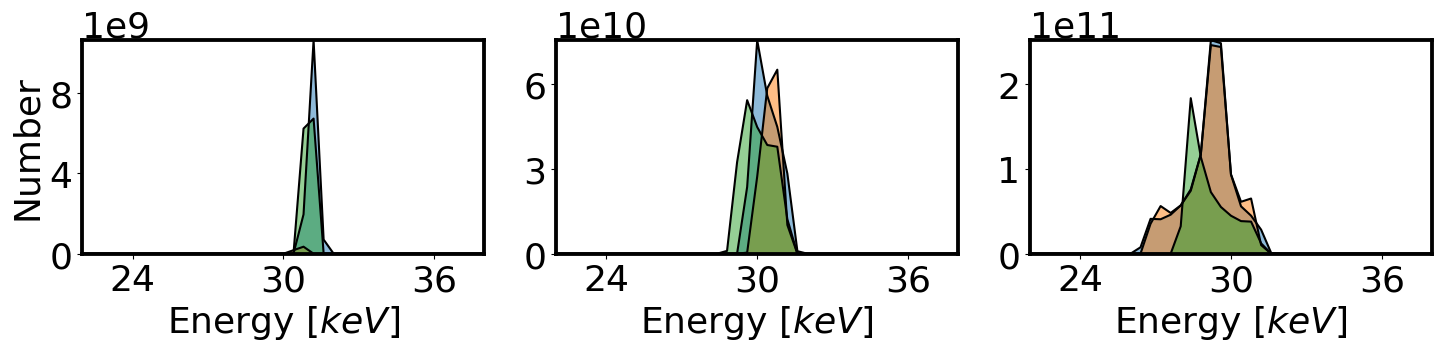

In [42]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4.1))

# Plot T1 vs. e_range with filled area
axes[0].plot(Square_top_k1['e_range'], Square_top_k1['T1'], color = 'black')
axes[0].fill_between(Square_top_k1['e_range'], Square_top_k1['T1'], label='Square-top', alpha=0.5)
axes[0].plot(Trapezoidal_k1['e_range'], Trapezoidal_k1['T1'],color = 'black')
axes[0].fill_between(Trapezoidal_k1['e_range'], Trapezoidal_k1['T1'], label='Trapezoidal', alpha=0.5)
axes[0].plot(Gaussian_k05['e_range'], Gaussian_k1['T1'],color = 'black')
axes[0].fill_between(Gaussian_k1['e_range'], Gaussian_k1['T1'], label='Gaussian', alpha=0.5)
axes[0].set_xlabel('Energy [$keV$]')
axes[0].set_ylabel('Number')
axes[0].set_xlim(22,38)
axes[0].set_ylim(0,max(Square_top_k1['T1']))
# Set number of bins
axes[0].xaxis.set_major_locator(MaxNLocator(nbins=3))
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=3))
# axes[0].legend(fontsize=20)

# Plot T2 vs. e_range with filled area
axes[1].plot(Square_top_k1['e_range'], Square_top_k1['T2'],color = 'black')
axes[1].fill_between(Square_top_k1['e_range'], Square_top_k1['T2'], label='Square top $k=1$', alpha=0.5)
axes[1].plot(Trapezoidal_k1['e_range'], Trapezoidal_k1['T2'],color = 'black')
axes[1].fill_between(Trapezoidal_k1['e_range'], Trapezoidal_k1['T2'], label='Trapezoidal $k=1$', alpha=0.5)
axes[1].plot(Gaussian_k1['e_range'], Gaussian_k1['T2'],color = 'black')
axes[1].fill_between(Gaussian_k1['e_range'], Gaussian_k1['T2'], label='Gaussian $k=1$', alpha=0.5)
axes[1].set_xlabel('Energy [$keV$]')
# axes[1].set_ylabel('Number')
axes[1].set_xlim(22,38)
axes[1].set_ylim(0,max(Square_top_k1['T2']))
# Set number of bins
axes[1].xaxis.set_major_locator(MaxNLocator(nbins=3))
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=3))
# axes[1].legend(fontsize=16)

# Plot T3 vs. e_range with filled area
axes[2].plot(Square_top_k1['e_range'], Square_top_k1['T3'],color = 'black')
axes[2].fill_between(Square_top_k1['e_range'], Square_top_k1['T3'], label='Square top $k=1$', alpha=0.5)
axes[2].plot(Trapezoidal_k1['e_range'], Trapezoidal_k1['T3'],color = 'black')
axes[2].fill_between(Trapezoidal_k1['e_range'], Trapezoidal_k1['T3'], label='Trapezoidal $k=1$', alpha=0.5)
axes[2].plot(Gaussian_k1['e_range'], Gaussian_k1['T3'],color = 'black')
axes[2].fill_between(Gaussian_k1['e_range'], Gaussian_k1['T3'], label='Gaussian $k=1$', alpha=0.5)
axes[2].set_xlabel('Energy [$keV$]')
# axes[2].set_ylabel('Number')
axes[2].set_xlim(22,38)
axes[2].set_ylim(0,max(Square_top_k1['T3']))
# Set number of bins
axes[2].xaxis.set_major_locator(MaxNLocator(nbins=3))
axes[2].yaxis.set_major_locator(MaxNLocator(nbins=3))
# axes[2].legend(fontsize=16)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


___

In [43]:
def read_text_files2(folder_path):
    # Initialize a dictionary to save the name and value of each DataFrame
    dict_df = {}

    # Iterate through all files and subdirectories in the given folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file starts with 'e' and has a .txt extension
            if file.startswith('u') and file.endswith('.txt'):
                # Construct the file path
                file_path = os.path.join(root, file)

                # Extract subfolder and subsubfolder names
                subfolder_name = os.path.basename(os.path.dirname(root))
                subsubfolder_name = os.path.basename(os.path.dirname(file_path))

                # Create a unique DataFrame name
                df_name = f"{subfolder_name}_{subsubfolder_name}_{os.path.splitext(file)[0]}"

                # Define custom column names
                column_names = ['p', 'u']

                # Read the text file into a DataFrame, skipping the first line and using custom column names
                df = pd.read_csv(file_path, delimiter='\t\t', skiprows=2, names=column_names)

                # Assign the DataFrame to the dynamically generated name
                globals()[df_name] = df

                # Save the DataFrame and its name to the dictionary
                dict_df[df_name] = df

                # Print information about the loaded DataFrame
                print(f"Loaded DataFrame '{df_name}' from '{file_path}'")

    # Return the dictionary containing DataFrame names and values
    return dict_df

In [44]:
# Example usage:
folder_path = '/content/drive/MyDrive/Research/PIC/NewPIC/sim 04 08/shortPulse'
dict_df = read_text_files2(folder_path)

Loaded DataFrame 'Gaussian_k075_u1' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 04 08/shortPulse/Gaussian/k075/u1.txt'
Loaded DataFrame 'Gaussian_k075_u2' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 04 08/shortPulse/Gaussian/k075/u2.txt'
Loaded DataFrame 'Gaussian_k075_u3' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 04 08/shortPulse/Gaussian/k075/u3.txt'
Loaded DataFrame 'Gaussian_k025_u1' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 04 08/shortPulse/Gaussian/k025/u1.txt'
Loaded DataFrame 'Gaussian_k025_u2' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 04 08/shortPulse/Gaussian/k025/u2.txt'
Loaded DataFrame 'Gaussian_k025_u3' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 04 08/shortPulse/Gaussian/k025/u3.txt'
Loaded DataFrame 'Gaussian_k1_u1' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 04 08/shortPulse/Gaussian/k1/u1.txt'
Loaded DataFrame 'Gaussian_k1_u2' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 04 08/shortPulse/Gaus

In [45]:
dict_df.keys()

dict_keys(['Gaussian_k075_u1', 'Gaussian_k075_u2', 'Gaussian_k075_u3', 'Gaussian_k025_u1', 'Gaussian_k025_u2', 'Gaussian_k025_u3', 'Gaussian_k1_u1', 'Gaussian_k1_u2', 'Gaussian_k1_u3', 'Gaussian_k01_u1', 'Gaussian_k01_u2', 'Gaussian_k01_u3', 'Gaussian_k05_u1', 'Gaussian_k05_u2', 'Gaussian_k05_u3', 'Trapezoidal_k05_u1', 'Trapezoidal_k05_u2', 'Trapezoidal_k05_u3', 'Trapezoidal_k01_u1', 'Trapezoidal_k01_u2', 'Trapezoidal_k01_u3', 'Trapezoidal_k1_u1', 'Trapezoidal_k1_u2', 'Trapezoidal_k1_u3', 'Trapezoidal_k075_u1', 'Trapezoidal_k075_u2', 'Trapezoidal_k075_u3', 'Trapezoidal_k025_u1', 'Trapezoidal_k025_u2', 'Trapezoidal_k025_u3', 'Square_top_k1_u1', 'Square_top_k1_u2', 'Square_top_k1_u3', 'Square_top_k01_u1', 'Square_top_k01_u2', 'Square_top_k01_u3', 'Square_top_k075_u1', 'Square_top_k075_u2', 'Square_top_k075_u3', 'Square_top_k025_u1', 'Square_top_k025_u2', 'Square_top_k025_u3', 'Square_top_k05_u1', 'Square_top_k05_u2', 'Square_top_k05_u3'])

### Square-top

In [46]:
u1s = dict_df['Square_top_k01_u1']
print(u1s)

               p           u
0       0.000365  34031300.0
1       0.000247  18796300.0
2       0.000245  18523100.0
3       0.000242  18183400.0
4       0.000236  17400500.0
...          ...         ...
138276  0.000701  68848300.0
138277  0.000702  68952300.0
138278  0.000701  68873900.0
138279  0.000701  68950300.0
138280  0.000696  68377600.0

[138281 rows x 2 columns]


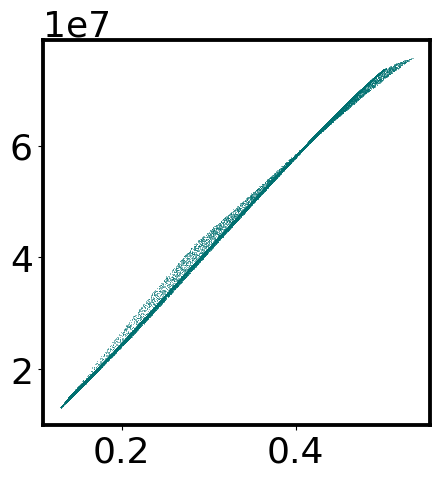

In [47]:
plt.scatter(u1s['p']/1.5e-3,u1s['u'], s=.2, linewidth=.1, facecolors='cyan', edgecolors='k')

In [48]:
u2s = dict_df['Square_top_k01_u2']
print(u2s)

               p            u
0       0.000719   54346200.0
1       0.000442   30501600.0
2       0.000437   30058100.0
3       0.000430   29534800.0
4       0.000416   28393500.0
...          ...          ...
134817  0.001410  109039000.0
134818  0.001424  110022000.0
134819  0.001421  109891000.0
134820  0.001419  109849000.0
134821  0.001419  109839000.0

[134822 rows x 2 columns]


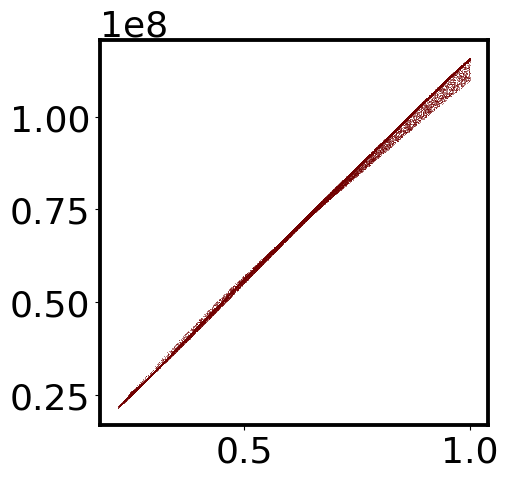

In [49]:
plt.scatter(u2s['p']/1.5e-3,u2s['u'] ,s=.21, linewidth=.1, facecolors='red', edgecolors='k')

In [50]:
u3s = dict_df['Square_top_k01_u3']
print(u3s)

              p           u
0      0.000918  61589000.0
1      0.000934  62350100.0
2      0.000924  61786700.0
3      0.000910  61028700.0
4      0.000881  59420800.0
...         ...         ...
46073  0.001433  92529400.0
46074  0.001385  89878500.0
46075  0.001368  88825300.0
46076  0.001327  84764500.0
46077  0.001391  90009700.0

[46078 rows x 2 columns]


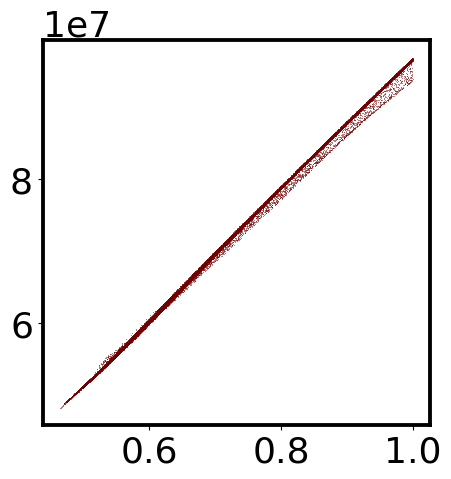

In [51]:
plt.scatter(u3s['p']/1.5e-3,u3s['u'], s=.21, linewidth=.1, facecolors='red', edgecolors='k')

### Trapezoidal

In [52]:
u1t = dict_df['Trapezoidal_k01_u1']
print(u1t)

               p           u
0       0.000333  28191400.0
1       0.000333  28153300.0
2       0.000335  28407600.0
3       0.000333  28194300.0
4       0.000338  28752100.0
...          ...         ...
115229  0.000716  69961400.0
115230  0.000711  69498800.0
115231  0.000762  72693900.0
115232  0.000716  69937900.0
115233  0.000715  69778500.0

[115234 rows x 2 columns]


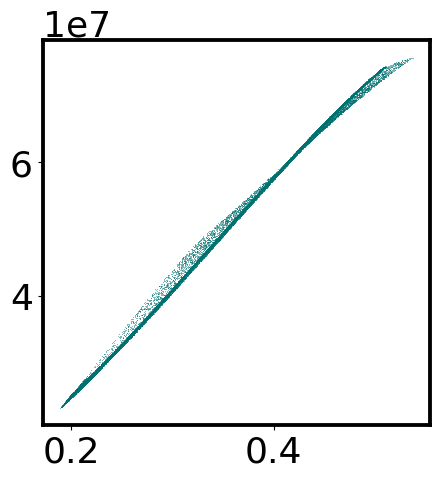

In [53]:
plt.scatter(u1t['p']/1.5e-3,u1t['u'], s=.2, linewidth=.1, facecolors='cyan', edgecolors='k')

In [54]:
u2t = dict_df['Trapezoidal_k01_u2']
print(u2t)

               p            u
0       0.000621   43900400.0
1       0.000620   43795100.0
2       0.000625   44225300.0
3       0.000621   43904900.0
4       0.000631   44642600.0
...          ...          ...
111541  0.001443  110755000.0
111542  0.001445  110766000.0
111543  0.001443  110913000.0
111544  0.001441  110342000.0
111545  0.001444  110816000.0

[111546 rows x 2 columns]


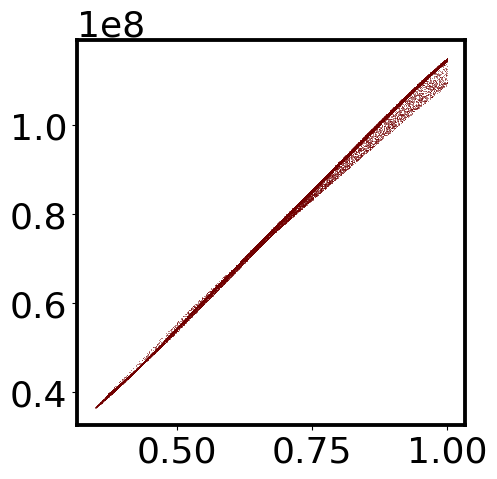

In [55]:
plt.scatter(u2t['p']/1.5e-3,u2t['u'] ,s=.21, linewidth=.1, facecolors='red', edgecolors='k')

In [56]:
u3t = dict_df['Trapezoidal_k01_u3']
print(u3t)

              p           u
0      0.000885  59243100.0
1      0.000883  59110100.0
2      0.000890  59578000.0
3      0.000885  59248800.0
4      0.000899  60077600.0
...         ...         ...
59365  0.001344  91785900.0
59366  0.001369  93186200.0
59367  0.001370  93448200.0
59368  0.001399  95252100.0
59369  0.001341  91580000.0

[59370 rows x 2 columns]


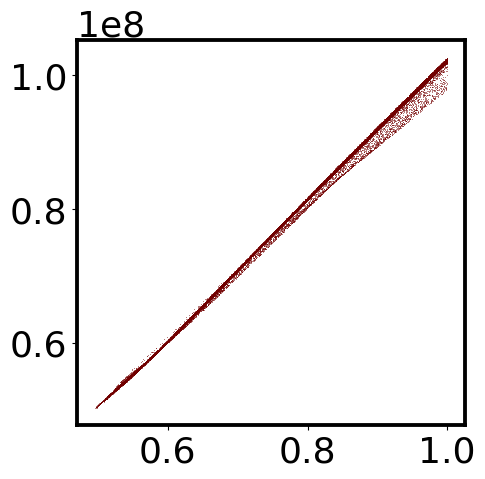

In [57]:
plt.scatter(u3t['p']/1.5e-3,u3t['u'], s=.21, linewidth=.1, facecolors='red', edgecolors='k')

### Gaussian

In [58]:
u1g = dict_df['Gaussian_k01_u1']
print(u1g)

              p           u
0      0.000424  42634000.0
1      0.000473  48707800.0
2      0.000417  41702000.0
3      0.000418  41795600.0
4      0.000420  42023900.0
...         ...         ...
61220  0.000733  71284300.0
61221  0.000731  71160200.0
61222  0.000732  71264700.0
61223  0.000732  71285600.0
61224  0.000732  71266800.0

[61225 rows x 2 columns]


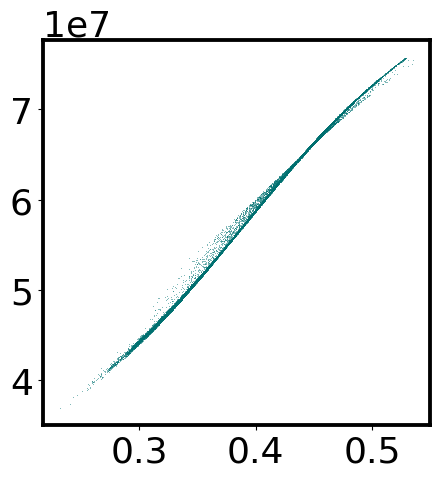

In [59]:
plt.scatter(u1g['p']/1.5e-3,u1g['u'], s=.2, linewidth=.1, facecolors='cyan', edgecolors='k')

In [60]:
u2g = dict_df['Gaussian_k01_u2']
print(u2g)

              p            u
0      0.000858   64635000.0
1      0.000966   72944000.0
2      0.000841   63231800.0
3      0.000843   63350600.0
4      0.000847   63683500.0
...         ...          ...
60826  0.001455  108150000.0
60827  0.001455  108192000.0
60828  0.001455  108426000.0
60829  0.001455  108402000.0
60830  0.001453  108393000.0

[60831 rows x 2 columns]


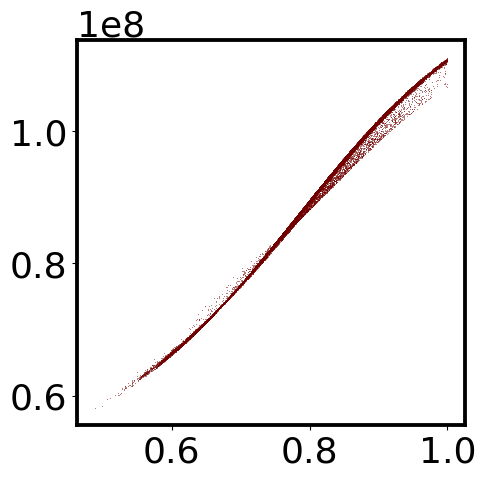

In [61]:
plt.scatter(u2g['p']/1.5e-3,u2g['u'] ,s=.21, linewidth=.1, facecolors='red', edgecolors='k')

In [62]:
u3g = dict_df['Gaussian_k01_u3']
print(u3g)

              p            u
0      0.000897   66548000.0
1      0.001011   74961900.0
2      0.000880   65119600.0
3      0.000882   65239300.0
4      0.000886   65578400.0
...         ...          ...
59240  0.001448  106703000.0
59241  0.001448  106760000.0
59242  0.001447  106757000.0
59243  0.001446  106902000.0
59244  0.001447  106708000.0

[59245 rows x 2 columns]


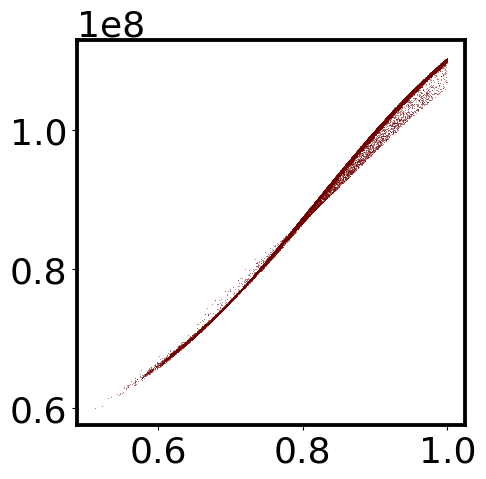

In [63]:
plt.scatter(u3g['p']/1.5e-3,u3g['u'], s=.21, linewidth=.1, facecolors='red', edgecolors='k')

### Comparison

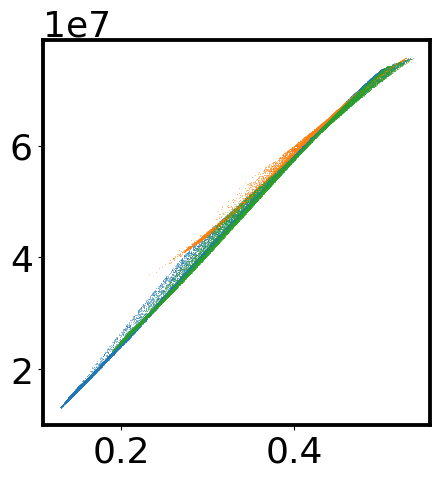

In [64]:
plt.scatter(u1s['p']/1.5e-3,u1s['u'], s=.2, linewidth=.1, label = 's')
plt.scatter(u1g['p']/1.5e-3,u1g['u'], s=.2, linewidth=.1, label = 'g')
plt.scatter(u1t['p']/1.5e-3,u1t['u'], s=.2, linewidth=.1, label = 't')

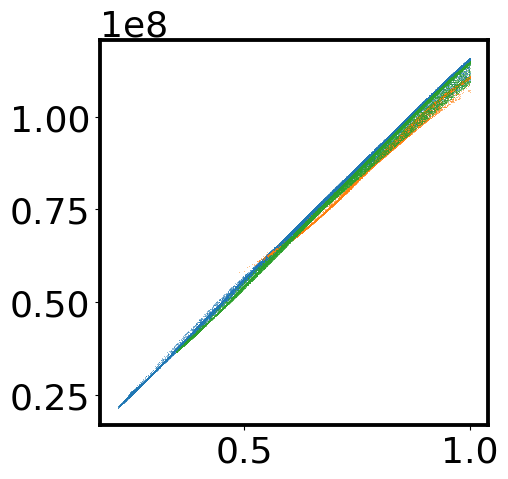

In [65]:
plt.scatter(u2s['p']/1.5e-3,u2s['u'], s=.2, linewidth=.1, label = 's')
plt.scatter(u2g['p']/1.5e-3,u2g['u'], s=.2, linewidth=.1, label = 'g')
plt.scatter(u2t['p']/1.5e-3,u2t['u'], s=.2, linewidth=.1, label = 't')

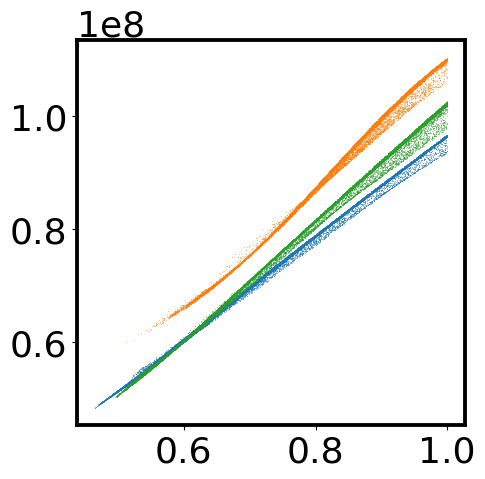

In [66]:
plt.scatter(u3s['p']/1.5e-3,u3s['u'], s=.2, linewidth=.1, label = 's')
plt.scatter(u3g['p']/1.5e-3,u3g['u'], s=.2, linewidth=.1, label = 'g')
plt.scatter(u3t['p']/1.5e-3,u3t['u'], s=.2, linewidth=.1, label = 't')

# Distortion with length

In [67]:
k_range = [0.1,0.25,0.5,0.75,1]  # Pulse length range

In [68]:
def read_text_files3(folder_path):
    # Initialize a dictionary to save the name and value of each DataFrame
    dict_df = {}

    # Iterate through all files and subdirectories in the given folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file starts with 'e' and has a .txt extension
            if file.startswith('i') and file.endswith('.txt'):
                # Construct the file path
                file_path = os.path.join(root, file)

                # Extract subfolder and subsubfolder names
                subfolder_name = os.path.basename(os.path.dirname(root))
                subsubfolder_name = os.path.basename(os.path.dirname(file_path))

                # Create a unique DataFrame name
                df_name = f"{subfolder_name}_{subsubfolder_name}_{os.path.splitext(file)[0]}"

                # Define custom column names
                column_names = ['t', 'i']

                # Read the text file into a DataFrame, skipping the first line and using custom column names
                df = pd.read_csv(file_path, delimiter='\t\t', skiprows=2, names=column_names)

                # # Define the values to be dropped
                # values_to_drop = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 46, 46.5, 47, 47.5, 48, 48.5, 49, 49.5, 50]

                # # Drop rows where 'p' column matches the specified values
                # df = df[~df['p'].isin(values_to_drop)]

                # Assign the DataFrame to the dynamically generated name
                globals()[df_name] = df

                # Save the DataFrame and its name to the dictionary
                dict_df[df_name] = df

                # Print information about the loaded DataFrame
                print(f"Loaded DataFrame '{df_name}' from '{file_path}'")

    # Return the dictionary containing DataFrame names and values
    return dict_df

In [69]:
# Example usage:
folder_path = '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/k'
dict_df = read_text_files3(folder_path)

Loaded DataFrame 'k_square_top_i01' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/k/square_top/i01.txt'
Loaded DataFrame 'k_square_top_i025' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/k/square_top/i025.txt'
Loaded DataFrame 'k_square_top_i05' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/k/square_top/i05.txt'
Loaded DataFrame 'k_square_top_i075' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/k/square_top/i075.txt'
Loaded DataFrame 'k_square_top_i1' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/k/square_top/i1.txt'
Loaded DataFrame 'k_gaussian_i01' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/k/gaussian/i01.txt'
Loaded DataFrame 'k_gaussian_i025' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/k/gaussian/i025.txt'
Loaded DataFrame 'k_gaussian_i05' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/k/ga

In [70]:
dict_df.keys()

dict_keys(['k_square_top_i01', 'k_square_top_i025', 'k_square_top_i05', 'k_square_top_i075', 'k_square_top_i1', 'k_gaussian_i01', 'k_gaussian_i025', 'k_gaussian_i05', 'k_gaussian_i075', 'k_gaussian_i1', 'k_trapezoidal_i01', 'k_trapezoidal_i025', 'k_trapezoidal_i05', 'k_trapezoidal_i075', 'k_trapezoidal_i1'])

### Square-top

#### k = 0.1

In [71]:
prefix = "k_square_top_i01"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values
  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-5:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt01s = np.mean(Dt)
sdDt01s = np.std(Dt)

In [72]:
meanDt01s

1.9600000000000002e-11

#### k = 0.25

In [73]:
prefix = "k_square_top_i025"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["k_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt025s = np.mean(Dt)
sdDt025s = np.std(Dt)

#### k = 0.5

In [74]:
prefix = "k_square_top_i05"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt05s = np.mean(Dt)
sdDt05s = np.std(Dt)

#### k = 0.75

In [75]:
prefix = "k_square_top_i075"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt075s = np.mean(Dt)
sdDt075s = np.std(Dt)

#### k = 1

In [76]:
prefix = "k_square_top_i1"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt1s = np.mean(Dt)
sdDt1s = np.std(Dt)

<ErrorbarContainer object of 3 artists>

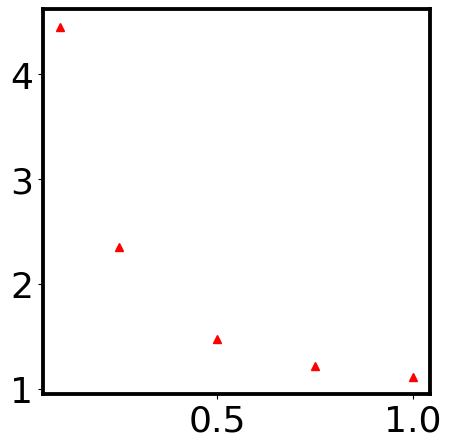

In [77]:
tp = np.array([.1,0.25,0.5,0.75,1])*44e-12

meanS = np.array([meanDt01s,meanDt025s,meanDt05s,meanDt075s,meanDt1s])/tp
errorS =  np.array([sdDt01s,sdDt025s,sdDt05s,sdDt075s,sdDt1s])/tp

# plt.scatter(k_range,XOOPIC_square,marker='x',s=100,label='XOOPIC')
plt.errorbar(k_range, meanS, yerr=errorS, fmt='^',color='r',label='PIC Square-top')

### Trapezoidal

#### k = 0.1

In [78]:
prefix = "k_trapezoidal_i01"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values
  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-5:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt01t = np.mean(Dt)
sdDt01t = np.std(Dt)

#### k = 0.25

In [79]:
prefix = "k_trapezoidal_i025"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt025t = np.mean(Dt)
sdDt025t = np.std(Dt)

#### k = 0.5

In [80]:
prefix = "k_trapezoidal_i05"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt05t = np.mean(Dt)
sdDt05t = np.std(Dt)

#### k = 0.75

In [81]:
prefix = "k_trapezoidal_i075"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt075t = np.mean(Dt)
sdDt075t = np.std(Dt)

#### k = 1

In [82]:
prefix = "k_trapezoidal_i1"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt1t = np.mean(Dt)
sdDt1t = np.std(Dt)

<ErrorbarContainer object of 3 artists>

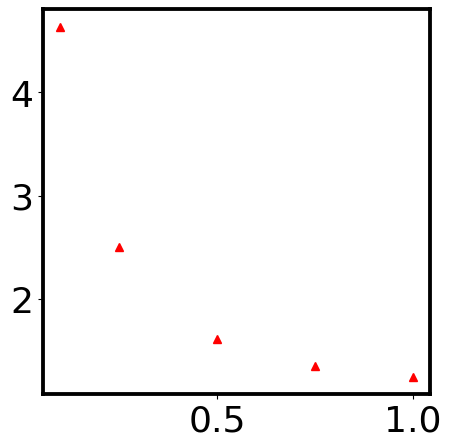

In [83]:
meanT = np.array([meanDt01t,meanDt025t,meanDt05t,meanDt075t,meanDt1t])/(1*tp)
errorT =  np.array([sdDt01t,sdDt025t,sdDt05t,sdDt075s,sdDt1t])/(1*tp)

# plt.scatter(k_range,XOOPIC_square,marker='x',s=100,label='XOOPIC')
plt.errorbar(k_range, meanT, yerr=errorT, fmt='^',color='r',label='PIC Trapezoidal')

### Gaussian

#### k = 0.1

In [84]:
prefix = "k_gaussian_i01"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values
  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-5:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt01g = np.mean(Dt)
sdDt01g = np.std(Dt)

#### k = 0.25

In [85]:
prefix = "k_gaussian_i025"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt025g = np.mean(Dt)
sdDt025g = np.std(Dt)

#### k = 0.5

In [86]:
prefix = "k_gaussian_i05"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt05g = np.mean(Dt)
sdDt05g = np.std(Dt)

#### k = 0.75

In [87]:
prefix = "k_gaussian_i075"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt075g = np.mean(Dt)
sdDt075g = np.std(Dt)

#### k = 1

In [88]:
prefix = "k_gaussian_i1"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt1g = np.mean(Dt)
sdDt1g = np.std(Dt)

<ErrorbarContainer object of 3 artists>

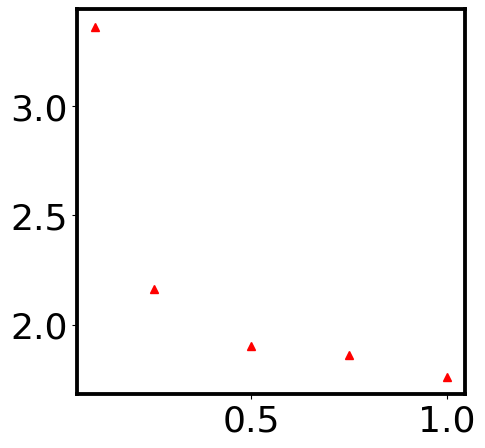

In [89]:
meanG = np.array([meanDt01g,meanDt025g,meanDt05g,meanDt075g,meanDt1g])/(1*tp)
errorG =  np.array([sdDt01g,sdDt025g,sdDt05g,sdDt075g,sdDt1g])/(1*tp)

# plt.scatter(k_range,XOOPIC_square,marker='x',s=100,label='XOOPIC')
plt.errorbar(k_range, meanG, yerr=errorG, fmt='^',color='r',label='PIC Gaussian')

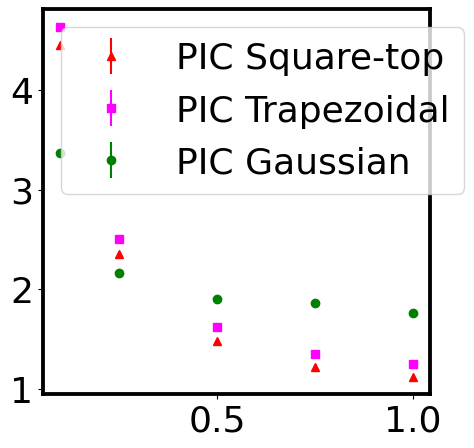

In [90]:
plt.errorbar(k_range, meanS, yerr=errorS, fmt='^',color='r',label='PIC Square-top')
plt.errorbar(k_range, meanT, yerr=errorT, fmt='s',color='magenta',label='PIC Trapezoidal')
plt.errorbar(k_range, meanG, yerr=errorG, fmt='o',color='g',label='PIC Gaussian')
plt.legend()

In [91]:
meanS

array([4.45454545, 2.35454545, 1.48181818, 1.22121212, 1.11818182])

In [92]:
meanT

array([4.63636364, 2.5       , 1.61363636, 1.34545455, 1.24545455])

In [93]:
meanG

array([3.36363636, 2.16363636, 1.90454545, 1.86060606, 1.76136364])

In [94]:
errorG

array([0., 0., 0., 0., 0.])

# Distortion with charge

In [95]:
f_range = [0.1,0.25,0.5,0.75,1]  # Pulse length range

In [96]:
def read_text_files4(folder_path):
    # Initialize a dictionary to save the name and value of each DataFrame
    dict_df = {}

    # Iterate through all files and subdirectories in the given folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file starts with 'e' and has a .txt extension
            if file.startswith('i') and file.endswith('.txt'):
                # Construct the file path
                file_path = os.path.join(root, file)

                # Extract subfolder and subsubfolder names
                subfolder_name = os.path.basename(os.path.dirname(root))
                subsubfolder_name = os.path.basename(os.path.dirname(file_path))

                # Create a unique DataFrame name
                df_name = f"{subfolder_name}_{subsubfolder_name}_{os.path.splitext(file)[0]}"

                # Define custom column names
                column_names = ['t', 'i']

                # Read the text file into a DataFrame, skipping the first line and using custom column names
                df = pd.read_csv(file_path, delimiter='\t\t', skiprows=2, names=column_names)

                # # Define the values to be dropped
                # values_to_drop = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 46, 46.5, 47, 47.5, 48, 48.5, 49, 49.5, 50]

                # # Drop rows where 'p' column matches the specified values
                # df = df[~df['p'].isin(values_to_drop)]

                # Assign the DataFrame to the dynamically generated name
                globals()[df_name] = df

                # Save the DataFrame and its name to the dictionary
                dict_df[df_name] = df

                # Print information about the loaded DataFrame
                print(f"Loaded DataFrame '{df_name}' from '{file_path}'")

    # Return the dictionary containing DataFrame names and values
    return dict_df

In [97]:
# Example usage:
folder_path = '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/f'
dict_df = read_text_files3(folder_path)

Loaded DataFrame 'f_square_top_i1' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/f/square_top/i1.txt'
Loaded DataFrame 'f_square_top_i075' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/f/square_top/i075.txt'
Loaded DataFrame 'f_square_top_i05' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/f/square_top/i05.txt'
Loaded DataFrame 'f_square_top_i025' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/f/square_top/i025.txt'
Loaded DataFrame 'f_square_top_i01' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/f/square_top/i01.txt'
Loaded DataFrame 'f_trapezoidal_i1' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/f/trapezoidal/i1.txt'
Loaded DataFrame 'f_trapezoidal_i075' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/distortion/f/trapezoidal/i075.txt'
Loaded DataFrame 'f_trapezoidal_i05' from '/content/drive/MyDrive/Research/PIC/NewPIC/sim 05 17/di

In [98]:
dict_df.keys()

dict_keys(['f_square_top_i1', 'f_square_top_i075', 'f_square_top_i05', 'f_square_top_i025', 'f_square_top_i01', 'f_trapezoidal_i1', 'f_trapezoidal_i075', 'f_trapezoidal_i05', 'f_trapezoidal_i025', 'f_trapezoidal_i01', 'f_gaussian_i1', 'f_gaussian_i075', 'f_gaussian_i05', 'f_gaussian_i025', 'f_gaussian_i01'])

### Square-top

#### k = 0.1

In [99]:
prefix = "f_square_top_i01"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values
  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-5:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt01s = np.mean(Dt)
sdDt01s = np.std(Dt)

#### k = 0.25

In [100]:
prefix = "f_square_top_i025"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt025s = np.mean(Dt)
sdDt025s = np.std(Dt)

#### k = 0.5

In [101]:
prefix = "f_square_top_i05"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt05s = np.mean(Dt)
sdDt05s = np.std(Dt)

#### k = 0.75

In [102]:
prefix = "f_square_top_i075"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt075s = np.mean(Dt)
sdDt075s = np.std(Dt)

#### k = 1

In [103]:
prefix = "f_square_top_i1"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt1s = np.mean(Dt)
sdDt1s = np.std(Dt)

<ErrorbarContainer object of 3 artists>

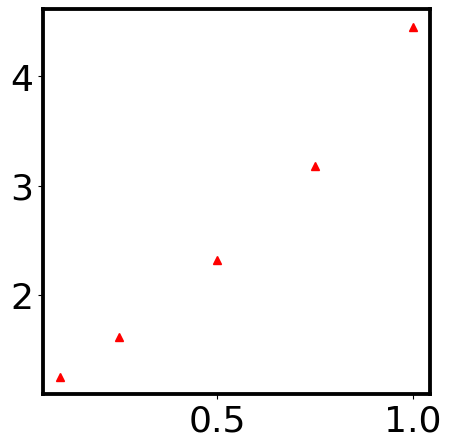

In [104]:
tp = np.array([.1])*44e-12

meanS = np.array([meanDt01s,meanDt025s,meanDt05s,meanDt075s,meanDt1s])/tp
errorS =  np.array([sdDt01s,sdDt025s,sdDt05s,sdDt075s,sdDt1s])/tp

# plt.scatter(k_range,XOOPIC_square,marker='x',s=100,label='XOOPIC')
plt.errorbar(k_range, meanS, yerr=errorS, fmt='^',color='r',label='PIC Square-top')

### Trapezoidal

#### k = 0.1

In [105]:
prefix = "f_trapezoidal_i01"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values
  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-5:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt01t = np.mean(Dt)
sdDt01t = np.std(Dt)

#### k = 0.25

In [106]:
prefix = "f_trapezoidal_i025"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt025t = np.mean(Dt)
sdDt025t = np.std(Dt)

#### k = 0.5

In [107]:
prefix = "f_trapezoidal_i05"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt05t = np.mean(Dt)
sdDt05t = np.std(Dt)

#### k = 0.75

In [108]:
prefix = "f_trapezoidal_i075"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt075t = np.mean(Dt)
sdDt075t = np.std(Dt)

#### k = 1

In [109]:
prefix = "f_trapezoidal_i1"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt1t = np.mean(Dt)
sdDt1t = np.std(Dt)

<ErrorbarContainer object of 3 artists>

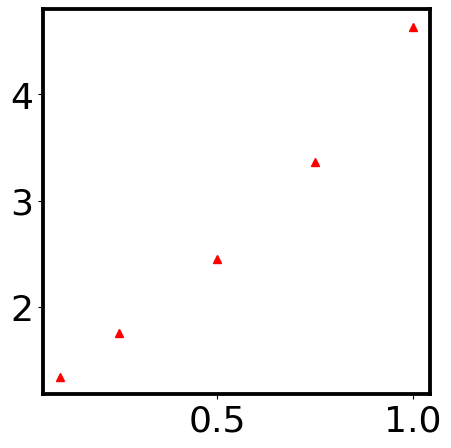

In [110]:
meanT = np.array([meanDt01t,meanDt025t,meanDt05t,meanDt075t,meanDt1t])/(1*tp)
errorT =  np.array([sdDt01t,sdDt025t,sdDt05t,sdDt075s,sdDt1t])/(1*tp)

# plt.scatter(k_range,XOOPIC_square,marker='x',s=100,label='XOOPIC')
plt.errorbar(k_range, meanT, yerr=errorT, fmt='^',color='r',label='PIC Trapezoidal')

### Gaussian

#### k = 0.1

In [111]:
prefix = "f_gaussian_i01"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values
  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-5:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt01g = np.mean(Dt)
sdDt01g = np.std(Dt)

#### k = 0.25

In [112]:
prefix = "f_gaussian_i025"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt025g = np.mean(Dt)
sdDt025g = np.std(Dt)

#### k = 0.5

In [113]:
prefix = "f_gaussian_i05"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt05g = np.mean(Dt)
sdDt05g = np.std(Dt)

#### k = 0.75

In [114]:
prefix = "f_gaussian_i075"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt075g = np.mean(Dt)
sdDt075g = np.std(Dt)

#### k = 1

In [115]:
prefix = "f_gaussian_i1"
# Dictionary comprehension to filter keys
filtered_dict = {key: dict_df[key] for key in dict_df if key.startswith(prefix)}

# del filtered_dict["distorsion_Square-top_i025_4"]

Dt = []
for _ in filtered_dict:
  df_ = filtered_dict[_]
  i = df_.iloc[:,1].values
  t = df_.iloc[:,0].values

  Ind = []
  for i_ in range(len(i)):
    if i[i_] < -0.1e-1:
        Ind.append(i_)
  dt = t[Ind[-1]]-t[Ind[0]]
  Dt.append(dt)

meanDt1g = np.mean(Dt)
sdDt1g = np.std(Dt)

<ErrorbarContainer object of 3 artists>

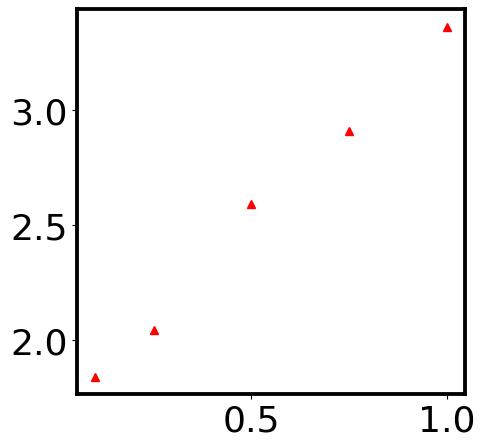

In [116]:
meanG = np.array([meanDt01g,meanDt025g,meanDt05g,meanDt075g,meanDt1g])/(1*tp)
errorG =  np.array([sdDt01g,sdDt025g,sdDt05g,sdDt075g,sdDt1g])/(1*tp)

# plt.scatter(k_range,XOOPIC_square,marker='x',s=100,label='XOOPIC')
plt.errorbar(k_range, meanG, yerr=errorG, fmt='^',color='r',label='PIC Gaussian')

In [117]:
meanS

array([1.25      , 1.61363636, 2.31818182, 3.18181818, 4.45454545])

In [118]:
meanT

array([1.34090909, 1.75      , 2.45454545, 3.36363636, 4.63636364])

In [119]:
meanG

array([1.84090909, 2.04545455, 2.59090909, 2.90909091, 3.36363636])

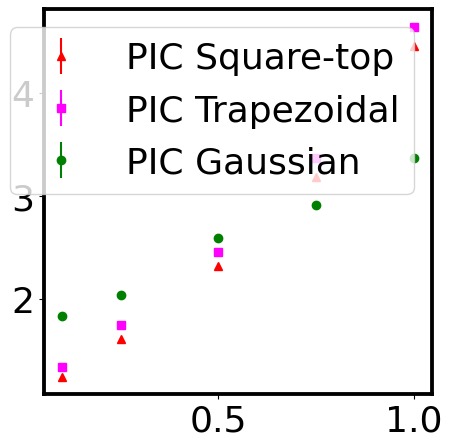

In [120]:
plt.errorbar(k_range, meanS, yerr=errorS, fmt='^',color='r',label='PIC Square-top')
plt.errorbar(k_range, meanT, yerr=errorT, fmt='s',color='magenta',label='PIC Trapezoidal')
plt.errorbar(k_range, meanG, yerr=errorG, fmt='o',color='g',label='PIC Gaussian')
plt.legend()

In [121]:
errorG

array([0., 0., 0., 0., 0.])